In [2]:
# %load ../init.ipy
%reload_ext autoreload
%autoreload 2
from importlib import reload

import numpy as np
import holodeck as holo
import holodeck.single_sources as ss
import holodeck.cyutils as cy
import matplotlib.pyplot as plt
import kalepy as kale


import matplotlib.cm as cm
from holodeck import plot, utils
from holodeck.constants import YR, MSOL
import holodeck.detstats as det

# Check ss_lib_combine is working

In [3]:
import h5py

In [4]:
ssfile = h5py.File('/Users/emigardiner/GWs/holodeck/brc_output/ss_lib_ss43.hdf5', 'r+')
list(ssfile.keys())

['bgpar',
 'fit_plaw',
 'fit_plaw_med',
 'fit_plaw_nbins',
 'fit_turn',
 'fit_turn_med',
 'fit_turn_nbins',
 'fobs',
 'hc_bg',
 'hc_ss',
 'sample_params',
 'sspar']

In [5]:
hc_bg_com = ssfile['hc_bg']
print(hc_bg_com.shape)
hc_ss_com = ssfile['hc_ss']
print(hc_ss_com.shape)
fobs_com = ssfile['fobs']
print(fobs_com.shape)
sspar_com = ssfile['sspar']
print(sspar_com.shape)
bgpar_com = ssfile['bgpar']
print(bgpar_com.shape)


(240, 100, 100)
(240, 100, 100, 5)
(100,)
(240, 3, 100, 100, 5)
(240, 3, 100, 100)


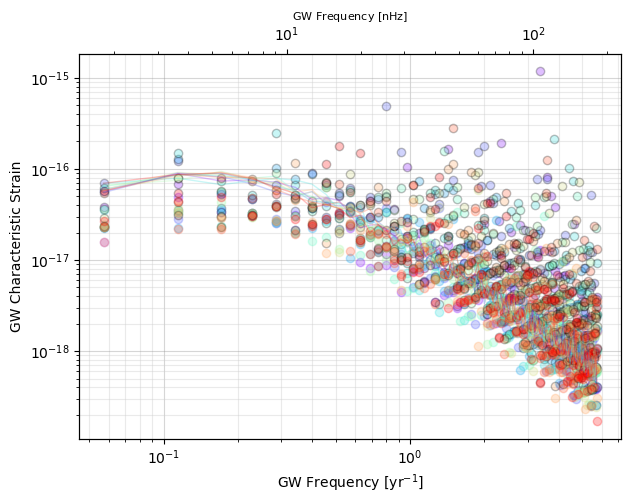

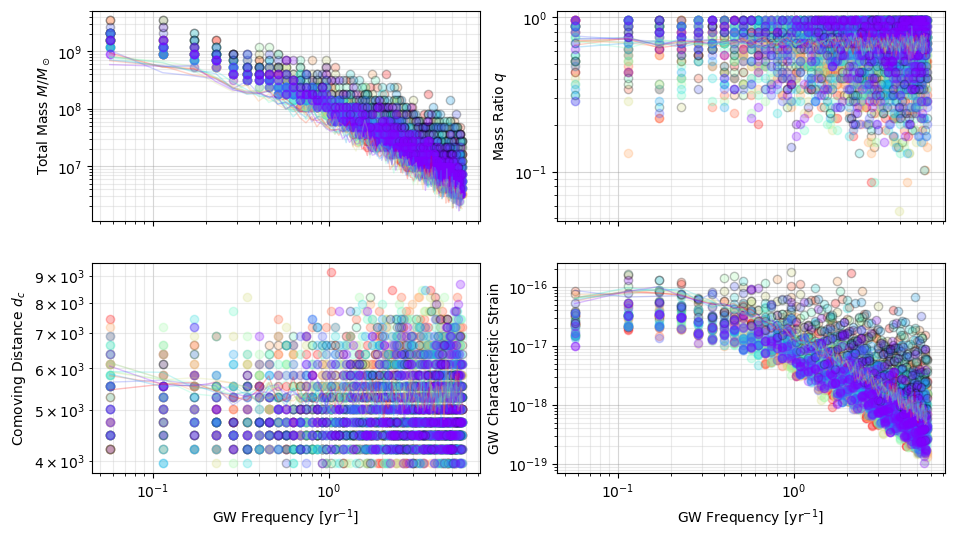

In [ ]:
for ii in range(0,1): #len(hc_bg_com)):
    fig = plot.plot_bg_ss(fobs_com[:], bg=hc_bg_com[ii], ss=hc_ss_com[ii])
    fig = plot.plot_pars(fobs_com[:], hc_ss_com[ii,...], hc_bg_com[ii,...], sspar_com[ii,...], bgpar_com[ii,...])


## without pars

In [7]:
# ssfile = h5py.File('/Users/emigardiner/GWs/holodeck/output/2023-05-03-mbp-ss05_n10_r10_f100_d17.5_l100_p1_s10/ss_lib.hdf5', 'r+')
# list(ssfile.keys())

['bgpar',
 'fit_plaw',
 'fit_plaw_med',
 'fit_plaw_nbins',
 'fit_turn',
 'fit_turn_med',
 'fit_turn_nbins',
 'fobs',
 'hc_bg',
 'hc_ss',
 'sample_params',
 'sspar']

In [9]:
# hc_bg_com2 = ssfile['hc_bg']
# print(hc_bg_com2.shape)
# hc_ss_com2 = ssfile['hc_ss']
# print(hc_ss_com2.shape)
# fobs_com2 = ssfile['fobs']
# print(fobs_com2.shape)
# # sspar_com = ssfile['sspar']
# # bgpar_com = ssfile['bgpar']


(10, 100, 10)
(10, 100, 10, 100)
(100,)


In [ ]:
# for ii in range(len(hc_bg_com2)):
#     fig = plot.plot_gwb(fobs_com2[:], gwb=hc_bg_com2[ii], hc_ss=hc_ss_com2[ii,:,:,0:2])
#     # fig = plot.plot_pars(fobs_com[:], hc_ss_com[ii,...,0:2], hc_bg_com[ii,...,0:2], sspar_com[ii,...,0:2], bgpar_com[ii,...,0:2])


# Check npz arrays

In [3]:
filename = '/Users/emigardiner/GWs/holodeck/brc_output/lib_ss__p000005_ss42.npz'
infile = np.load(filename)
print(infile.files)
fobs_npz = infile['fobs']
xx = fobs_npz*YR
hc_ss_npz = infile['hc_ss']
print(hc_ss_npz.shape)
hc_bg_npz = infile['hc_bg']
print(hc_bg_npz.shape)
sspar_npz = infile['sspar']
print(sspar_npz.shape)
bgpar_npz = infile['bgpar']
print(bgpar_npz.shape)

['fobs', 'fobs_edges', 'hc_ss', 'hc_bg', 'sspar', 'bgpar', 'fit_plaw_nbins', 'fit_plaw', 'fit_plaw_med', 'fit_turn_nbins', 'fit_turn', 'fit_turn_med']
(100, 100, 1000)
(100, 100)
(3, 100, 100, 1000)
(3, 100, 100)


really slow to plot for 1000 loudest

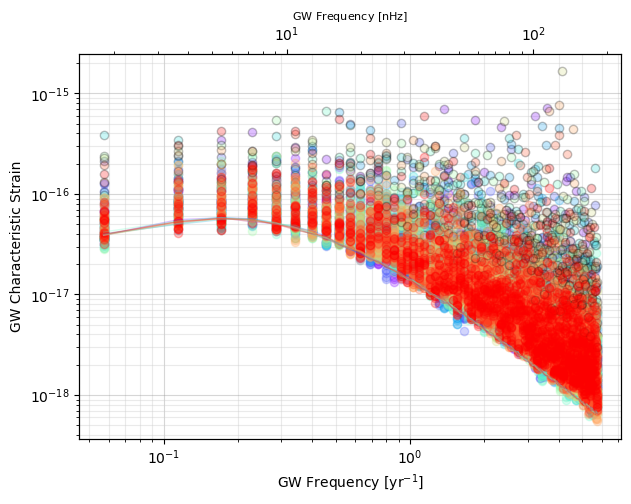

In [4]:
fig1 = plot.plot_bg_ss(fobs_npz, bg=hc_bg_npz, ss=hc_ss_npz[...,0:15])

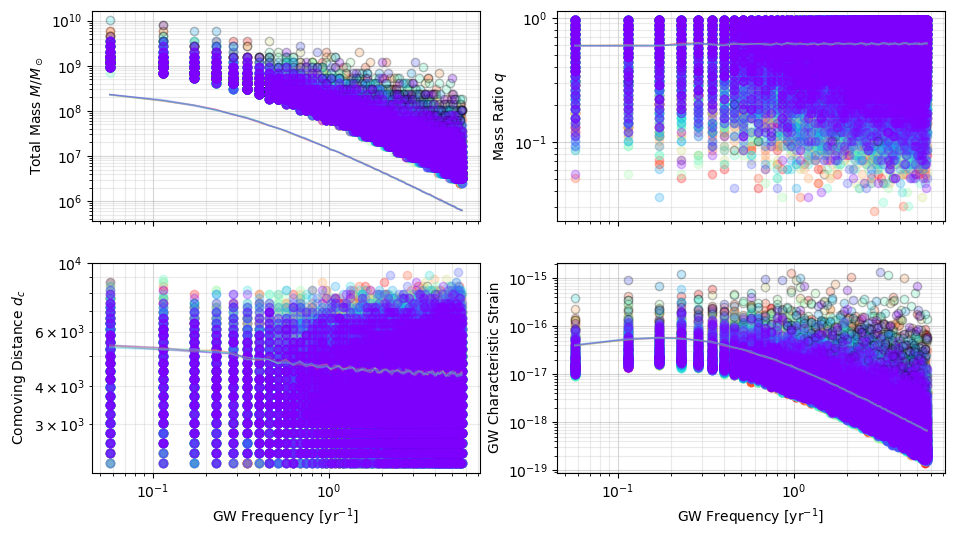

In [5]:
fig2 = plot.plot_pars(fobs_npz, hc_ss_npz[...,:100], hc_bg_npz, sspar_npz[...,:100], bgpar_npz)

trying all 1000

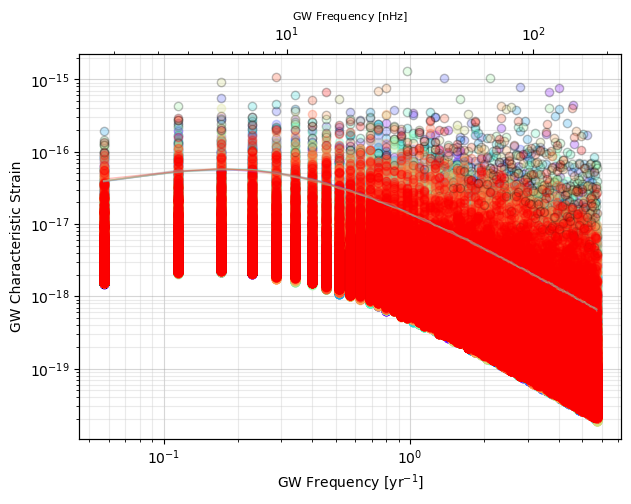

In [7]:
fig1 = plot.plot_bg_ss(fobs_npz, bg=hc_bg_npz, ss=hc_ss_npz)

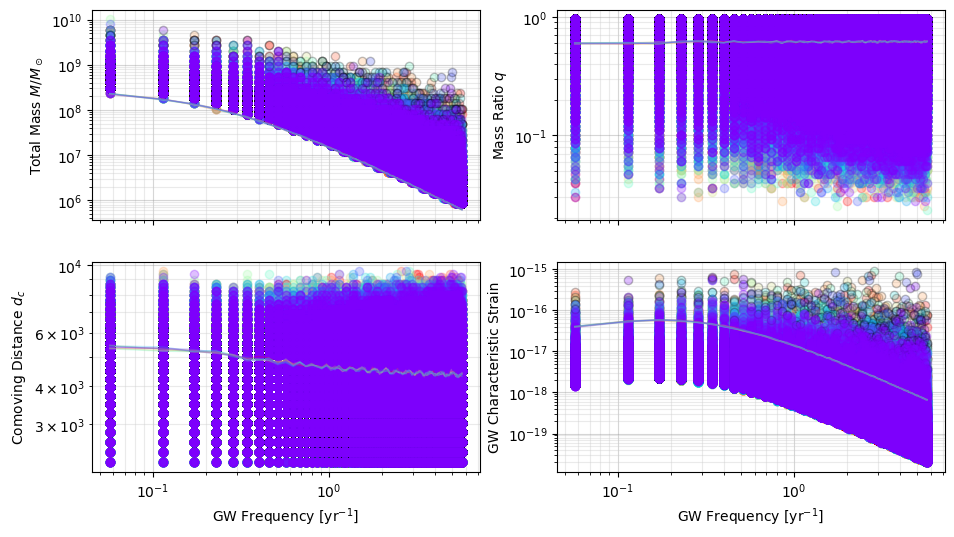

In [8]:
fig2 = plot.plot_pars(fobs_npz, hc_ss_npz, hc_bg_npz, sspar_npz, bgpar_npz)

# Check 100 loudest

In [2]:
dur = 17.5*YR
cad = 1/12*YR
fobs = utils.nyquist_freqs(dur,cad)
fobs_edges = utils.nyquist_freqs_edges(dur,cad)
sam = holo.sam.Semi_Analytic_Model() 
# sam = holo.sam.Semi_Analytic_Model(mtot=(1.0e4*MSOL, 1.0e11*MSOL, 20), mrat=(1e-3, 1.0, 20), redz=(1e-3, 10.0, 20))  # faster version
hard = holo.hardening.Hard_GW

Calculate strain

In [3]:
fobs_orb_edges = fobs_edges / 2.0 
fobs_orb_cents = fobs/ 2.0
# edges
edges, dnum = sam.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents) # should the zero stalled option be part of the parameter space?
edges[-1] = fobs_orb_edges
# integrate for number
number = utils._integrate_grid_differential_number(edges, dnum, freq=False)
number = number * np.diff(np.log(fobs_edges)) 
hc_ss, hc_bg, sspar, bgpar = ss.ss_gws(edges, number, realize=30, \
                                        loudest = 100, params = True) 

13:48:00 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
13:48:00 INFO : Stalled SAM bins based on GMT: 1.98e+05/4.99e+05 = 3.96e-01 [sam.py:static_binary_density]
13:48:01 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
13:48:01 INFO : 	dens bef: (1.28e-114, 5.22e-53, 2.59e-13, 2.12e-03, 1.66e-02, 2.92e-02, 4.47e-02) [sam.py:static_binary_density]
13:48:07 INFO : Scatter added after 6.347457 sec [sam.py:static_binary_density]
13:48:07 INFO : 	dens aft: (6.14e-17, 7.92e-09, 2.90e-06, 2.19e-03, 1.69e-02, 2.92e-02, 4.27e-02) [sam.py:static_binary_density]
13:48:07 INFO : 	mass: 8.56e-02 ==> 8.54e-02 || change = -1.8507e-03 [sam.py:static_binary_density]
13:48:07 INFO : zeroing out 1.98e+05/4.99e+05 = 3.96e-01 systems stalled from GMT [sam.py:static_binary_density]
13:48:09 INFO : fraction of coalesced binaries: 3.91e+06/5.24e+07 = 7.45e-02 [sam.py:dynamic_binary_number]
13:48:09 INFO : stalled binaries are not being accounted for in

In [19]:
print(fobs.shape)

(105,)


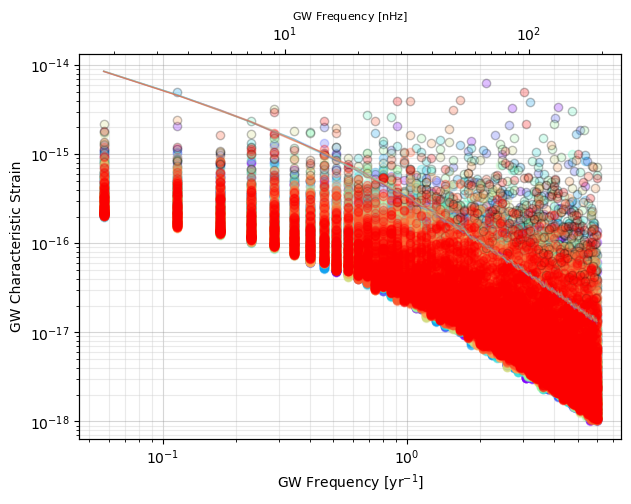

In [20]:
fig = plot.plot_gwb(fobs, gwb=hc_bg, hc_ss=hc_ss)

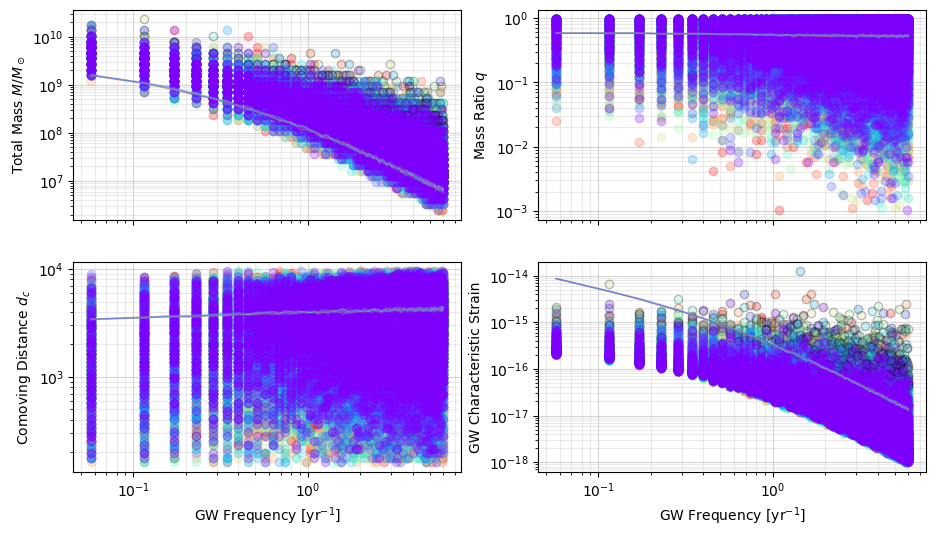

In [21]:
fig = plot.plot_pars(fobs, hc_ss, hc_bg, sspar, bgpar)

# Check 1000 loudest

calculate strain, same SAM

In [4]:
fobs_orb_edges = fobs_edges / 2.0 
fobs_orb_cents = fobs/ 2.0
# edges
edges, dnum = sam.dynamic_binary_number(hard, fobs_orb=fobs_orb_cents) # should the zero stalled option be part of the parameter space?
edges[-1] = fobs_orb_edges
# integrate for number
number = utils._integrate_grid_differential_number(edges, dnum, freq=False)
number = number * np.diff(np.log(fobs_edges)) 
hc_ss1000, hc_bg1000, sspar1000, bgpar1000 = ss.ss_gws(edges, number, realize=30, \
                                        loudest = 1000, params = True) 

18:41:38 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
18:41:40 INFO : fraction of coalesced binaries: 3.91e+06/5.24e+07 = 7.45e-02 [sam.py:dynamic_binary_number]
18:41:40 WARNING : WARNING: _stalled_ binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
45.5 s ± 498 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
fig = plot.plot_gwb(fobs, gwb=hc_bg1000, hc_ss=hc_ss1000)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x285c70700> (for post_execute):


KeyboardInterrupt: 

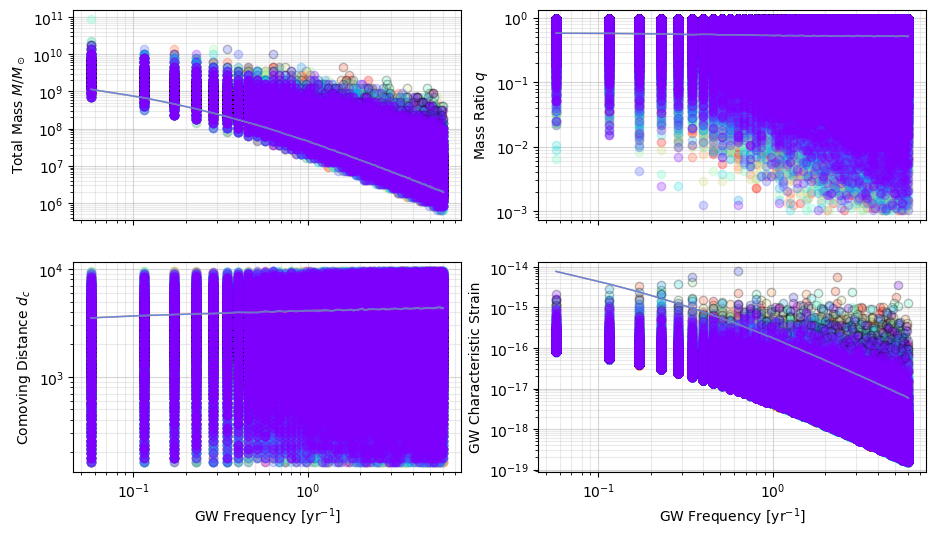

In [ ]:
fig = plot.plot_pars(fobs, hc_ss1000, hc_bg1000, sspar1000, bgpar1000)